In [220]:
import pandas as pd
import matplotlib.pyplot as plt

df_Movies = pd.read_excel("KOBIS_역대_박스오피스(통합전산망_집계_기준)_2023-12-18.xlsx",engine='openpyxl')
new_header = df_Movies.iloc[3]
df_Movies = df_Movies[4:]
df_Movies.columns = new_header
df_Movies = df_Movies.set_index(keys='순위')
df_Movies = df_Movies.dropna(how='any')
df_tenMillions = df_Movies[df_Movies['관객수'] >= 10000000]
df_Movies

3,영화명,개봉일,매출액,관객수,스크린수,상영횟수,대표국적,국적,배급사
순위,,,,,,,,,
1,명량,2014-07-30 00:00:00,135762080310,17616299,1587,188729,한국,한국,(주)씨제이이엔엠
2,극한직업,2019-01-23 00:00:00,139657105516,16266480,2003,292817,한국,한국,(주)씨제이이엔엠
3,신과함께-죄와 벌,2017-12-20 00:00:00,115727528087,14414658,1912,214631,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,국제시장,2014-12-17 00:00:00,110954970230,14265682,1044,212720,한국,한국,(주)씨제이이엔엠
5,어벤져스: 엔드게임,2019-04-24 00:00:00,122492181020,13977602,2835,246433,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
...,...,...,...,...,...,...,...,...,...
196,분노의 질주: 홉스&쇼,2019-08-14 00:00:00,32242734793,3657627,1311,94904,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)
197,모가디슈,2021-07-28 00:00:00,34604034626,3619496,1688,212058,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
198,인턴,2015-09-24 00:00:00,28522202348,3611166,659,81589,미국,미국,워너브러더스 코리아(주)


In [221]:
df_tenMillions.head()

3,영화명,개봉일,매출액,관객수,스크린수,상영횟수,대표국적,국적,배급사
순위,,,,,,,,,
1,명량,2014-07-30 00:00:00,135762080310,17616299,1587,188729,한국,한국,(주)씨제이이엔엠
2,극한직업,2019-01-23 00:00:00,139657105516,16266480,2003,292817,한국,한국,(주)씨제이이엔엠
3,신과함께-죄와 벌,2017-12-20 00:00:00,115727528087,14414658,1912,214631,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,국제시장,2014-12-17 00:00:00,110954970230,14265682,1044,212720,한국,한국,(주)씨제이이엔엠
5,어벤져스: 엔드게임,2019-04-24 00:00:00,122492181020,13977602,2835,246433,미국,미국,월트디즈니컴퍼니코리아 유한책임회사


In [222]:
df_tenMillions.tail()

3,영화명,개봉일,매출액,관객수,스크린수,상영횟수,대표국적,국적,배급사
순위,,,,,,,,,
24,왕의 남자,2005-12-29 00:00:00,66019904400,10514177,313,111193,한국,한국,(주)시네마서비스
25,어벤져스: 에이지 오브 울트론,2015-04-23 00:00:00,88645598646,10504487,1843,194385,미국,미국,"월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)"
26,인터스텔라,2014-11-06 00:00:00,83072616000,10342523,1410,170542,미국,"미국,영국",워너브러더스 코리아(주)
27,겨울왕국,2014-01-16 00:00:00,82773520337,10328773,1010,160122,미국,미국,"월트디즈니컴퍼니코리아 유한책임회사,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)"
28,기생충,2019-05-30 00:00:00,87464402795,10313735,1948,206480,한국,한국,(주)씨제이이엔엠


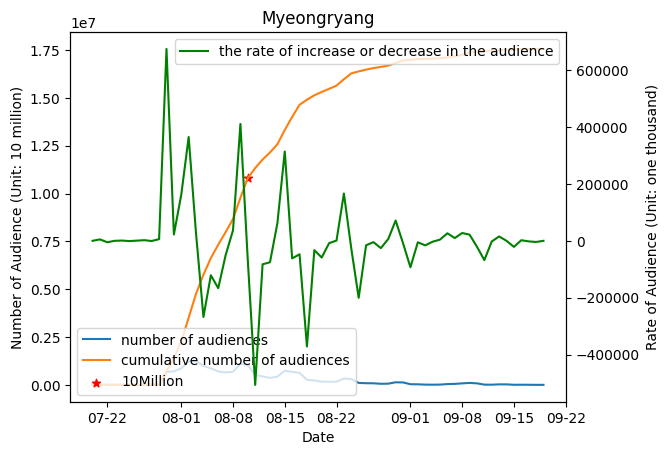

In [223]:
# 천만이 됐던 '명량'

df_Myeongryang = pd.read_excel("명량_KOBIS_일자별_통계정보_2023-12-18.xlsx", engine='openpyxl')
new_header = df_Myeongryang.iloc[2]
df_Myeongryang = df_Myeongryang[3:]
df_Myeongryang.columns = new_header
df_Myeongryang = df_Myeongryang.reset_index(drop=True)

df_Myeongryang = df_Myeongryang.loc[:60]
idx_first_10m = df_Myeongryang[df_Myeongryang['누적관객수'] >= 10000000].index.min()

df_Myeongryang['관객수증감(전일대비)'] = df_Myeongryang['관객수증감(전일대비)'].str.replace(r'\([^)]*\)', '', regex=True)
df_Myeongryang['관객수증감(전일대비)'] = df_Myeongryang['관객수증감(전일대비)'].astype('int')
df_Myeongryang['누적관객수'] = df_Myeongryang['누적관객수'].astype('int')
df_Myeongryang['관객수'] = df_Myeongryang['관객수'].astype('int')

df_Myeongryang['날짜'] = pd.to_datetime(df_Myeongryang['날짜'])
fig, ax1 = plt.subplots()
ax1.plot(df_Myeongryang['날짜'], df_Myeongryang['관객수'], label="number of audiences")
plt.plot(df_Myeongryang['날짜'], df_Myeongryang['누적관객수'], label="cumulative number of audiences")
ax2 = ax1.twinx()
ax2.plot(df_Myeongryang['날짜'], df_Myeongryang['관객수증감(전일대비)'], label="the rate of increase or decrease in the audience", color="green")
ax1.scatter(df_Myeongryang['날짜'][idx_first_10m], df_Myeongryang['누적관객수'][idx_first_10m], marker="*", color='red', label='10Million')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

ax1.set_title("Myeongryang")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Audience (Unit: 10 million)")
ax2.set_ylabel("Rate of Audience (Unit: one thousand)")

ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
plt.show()

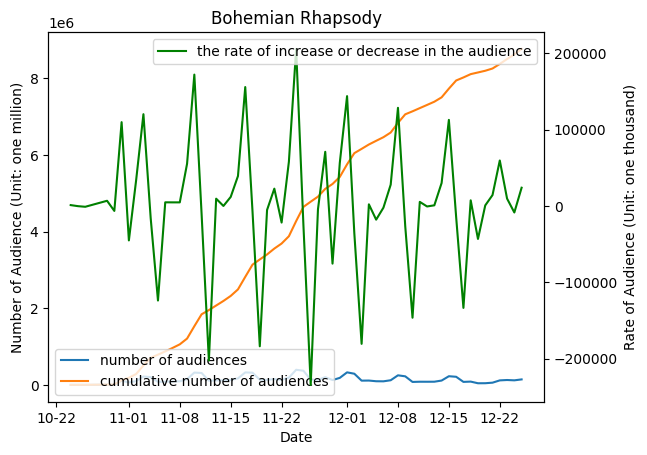

In [224]:
# 천만이 되지 못했던 '보헤미안 랩소디'
import matplotlib.ticker as ticker

df_Bohemian = pd.read_excel("보헤미안_KOBIS_일자별_통계정보_2023-12-19.xlsx", engine='openpyxl')
new_header = df_Bohemian.iloc[2]
df_Bohemian = df_Bohemian[3:]
df_Bohemian.columns = new_header
df_Bohemian = df_Bohemian.reset_index(drop=True)
df_Bohemian = df_Bohemian.loc[:60]

df_Bohemian['관객수증감(전일대비)'] = df_Bohemian['관객수증감(전일대비)'].str.replace(r'\([^)]*\)', '', regex=True)
df_Bohemian['관객수증감(전일대비)'] = df_Bohemian['관객수증감(전일대비)'].astype('int')
df_Bohemian['누적관객수'] = df_Bohemian['누적관객수'].astype('int')
df_Bohemian['관객수'] = df_Bohemian['관객수'].astype('int')

df_Bohemian['날짜'] = pd.to_datetime(df_Bohemian['날짜'])
fig, ax1 = plt.subplots()
ax1.plot(df_Bohemian['날짜'], df_Bohemian['관객수'], label="number of audiences")
ax1.plot(df_Bohemian['날짜'], df_Bohemian['누적관객수'], label="cumulative number of audiences")
ax2 = ax1.twinx()
ax2.plot(df_Bohemian['날짜'], df_Bohemian['관객수증감(전일대비)'], label="the rate of increase or decrease in the audience", color="green")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

ax1.set_title("Bohemian Rhapsody")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Audience (Unit: one million)")
ax2.set_ylabel("Rate of Audience (Unit: one thousand)")

ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
plt.show()

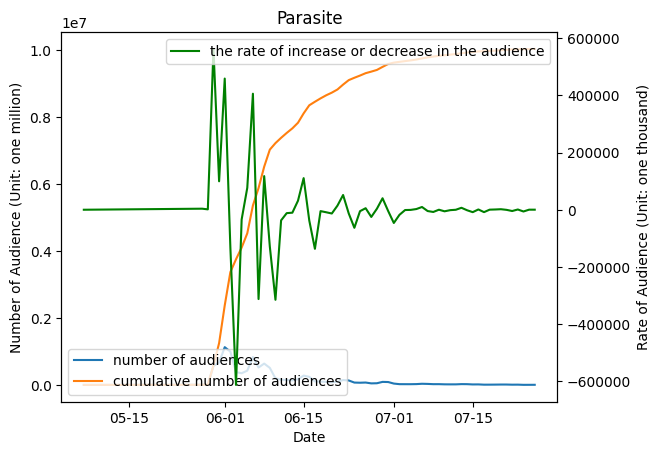

In [225]:
#천만 영화 중 가장 적은 누적관객수를 가진 '기생충'
df_Parasite = pd.read_excel("기생충_KOBIS_일자별_통계정보_2023-12-19.xlsx", engine='openpyxl')
new_header = df_Parasite.iloc[2]
df_Parasite = df_Parasite[3:]
df_Parasite.columns = new_header
df_Parasite = df_Parasite.reset_index(drop=True)
df_Parasite = df_Parasite.loc[:60]

df_Parasite['관객수증감(전일대비)'] = df_Parasite['관객수증감(전일대비)'].str.replace(r'\([^)]*\)', '', regex=True)
df_Parasite['관객수증감(전일대비)'] = df_Parasite['관객수증감(전일대비)'].astype('int')
df_Parasite['누적관객수'] = df_Parasite['누적관객수'].astype('int')
df_Parasite['관객수'] = df_Parasite['관객수'].astype('int')

df_Parasite['날짜'] = pd.to_datetime(df_Parasite['날짜'])
fig, ax1 = plt.subplots()
ax1.plot(df_Parasite['날짜'], df_Parasite['관객수'], label="number of audiences")
ax1.plot(df_Parasite['날짜'], df_Parasite['누적관객수'], label="cumulative number of audiences")
ax2 = ax1.twinx()
ax2.plot(df_Parasite['날짜'], df_Parasite['관객수증감(전일대비)'], label="the rate of increase or decrease in the audience", color="green")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

ax1.set_title("Parasite")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Audience (Unit: one million)")
ax2.set_ylabel("Rate of Audience (Unit: one thousand)")

ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
plt.show()

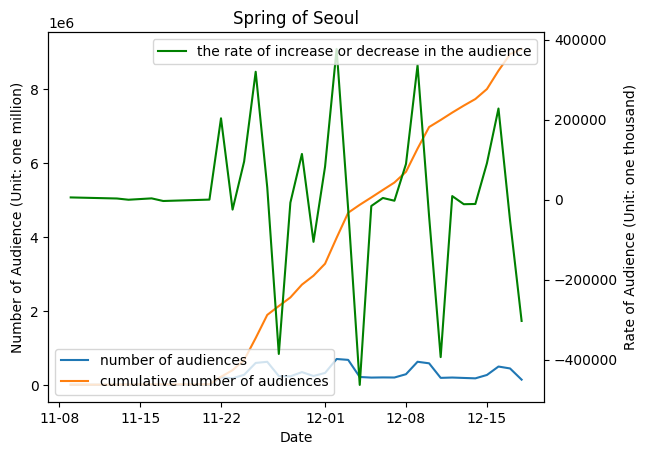

In [226]:
# 분석해보고자 하는 '서울의 봄'
df_SpringofSeoul = pd.read_excel("서울의_봄_KOBIS_일자별_통계정보_2023-12-19.xlsx", engine='openpyxl')
new_header = df_SpringofSeoul.iloc[2]
df_SpringofSeoul = df_SpringofSeoul[3:]
df_SpringofSeoul.columns = new_header
df_SpringofSeoul = df_SpringofSeoul.reset_index(drop=True)

df_SpringofSeoul['관객수증감(전일대비)'] = df_SpringofSeoul['관객수증감(전일대비)'].str.replace(r'\([^)]*\)', '', regex=True)
df_SpringofSeoul['관객수증감(전일대비)'] = df_SpringofSeoul['관객수증감(전일대비)'].astype('int')
df_Bohemian['누적관객수'] = df_Bohemian['누적관객수'].astype('int')
df_Bohemian['관객수'] = df_Bohemian['관객수'].astype('int')

df_SpringofSeoul['날짜'] = pd.to_datetime(df_SpringofSeoul['날짜'])
fig, ax1 = plt.subplots()
ax1.plot(df_SpringofSeoul['날짜'], df_SpringofSeoul['관객수'], label="number of audiences")
ax1.plot(df_SpringofSeoul['날짜'], df_SpringofSeoul['누적관객수'], label="cumulative number of audiences")
ax2 = ax1.twinx()
ax2.plot(df_SpringofSeoul['날짜'], df_SpringofSeoul['관객수증감(전일대비)'], label="the rate of increase or decrease in the audience", color="green")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))


ax1.set_title("Spring of Seoul")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Audience (Unit: one million)")
ax2.set_ylabel("Rate of Audience (Unit: one thousand)")

ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
plt.show()

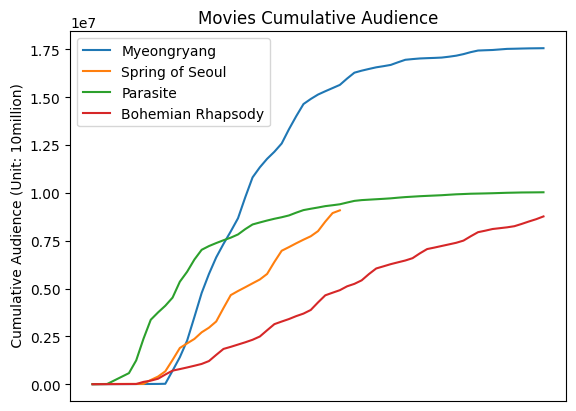

'\n서울의 봄은\n명량 정도의 관객수를 가지기엔 힘들어 보인다.\n다만, 아깝게 천만이 되지 못한 보헤미안 랩소디보다는 증가폭이 크고,\n가까스로 천만이 된 기생충보다는 늦도록 증가세를 보이고 있다.\n천만을 돌파할 수 있을 것 같다.\n'

In [234]:
df_copy = df_Myeongryang.copy(deep=True)
df_copy['날짜'] = df_Bohemian['날짜']
df_copy2 = df_SpringofSeoul.copy(deep=True)
df_copy2['날짜'] = df_Bohemian['날짜']
df_copy3 = df_Parasite.copy(deep=True)
df_copy3['날짜'] = df_Bohemian['날짜']
fig, ax = plt.subplots()

ax.plot(df_copy['날짜'], df_copy['누적관객수'], label='Myeongryang')
ax.plot(df_copy2['날짜'], df_copy2['누적관객수'], label='Spring of Seoul')
ax.plot(df_copy3['날짜'], df_copy3['누적관객수'], label='Parasite')
ax.plot(df_Bohemian['날짜'], df_Bohemian['누적관객수'], label='Bohemian Rhapsody')

ax.set_title("Movies Cumulative Audience")
ax.set_ylabel(" Cumulative Audience (Unit: 10million)")
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend()
plt.show()

'''
서울의 봄은
명량 정도의 관객수를 가지기엔 힘들어 보인다.
다만, 아깝게 천만이 되지 못한 보헤미안 랩소디보다는 증가폭이 크고,
가까스로 천만이 된 기생충보다는 늦도록 증가세를 보이고 있다.
천만을 돌파할 수 있을 것 같다.
'''

In [235]:
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

df_Movies['개봉일'] = pd.to_datetime(df_Movies['개봉일'])


df_Movies['경과일'] = (datetime.now() - df_Movies['개봉일']).dt.days


features = ['스크린수', '상영횟수', '경과일']

X = df_Movies[features]
y = df_Movies['관객수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# 서울의 봄에 대한 누적 관객수 예측
new_movie = pd.DataFrame([[df_SpringofSeoul['스크린수'].max(), df_SpringofSeoul['상영횟수'].sum(), (datetime.now() - df_SpringofSeoul.loc[0]['날짜']).days]], columns=features)
predicted_audience = model.predict(new_movie)
print(f"예측된 누적 관객수: {predicted_audience}")
actual_audience = df_SpringofSeoul.iloc[-1]['누적관객수']
print(f"실제 누적 관객수: {actual_audience}")

"""
연속형 변수들로 연속형 변수를 예측할 수 있다는 RandomForestRegressor를 이용해 봤다.
약 백 만 차이가 나는데, 좀 큰 숫자지만 그래도 꽤나 유사하게 맞춘 것 같다.
"""

RMSE: 1143418.6425440756
예측된 누적 관객수: [8142289.77]
실제 누적 관객수: 9083393


'\n연속형 변수들로 연속형 변수를 예측할 수 있다는 RandomForestRegressor를 이용해 봤다.\n약 백 만 차이가 나는데, 좀 큰 숫자지만 그래도 꽤나 유사하게 맞춘 것 같다.\n'

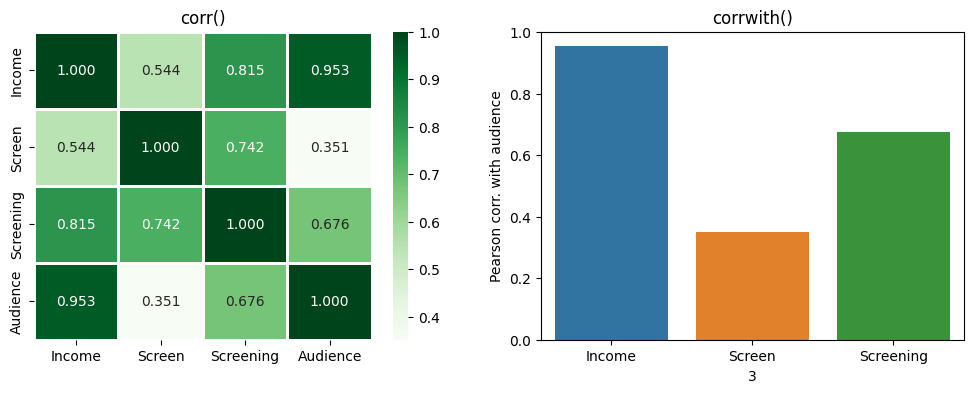

'\n누적관객수와 매출액(Income), 스크린수(Screen), 상영횟수(Screening) 중 어느 것이 가장 상관관계가 높을까 확인해봤다.\n압도적으로 매출액이 상관관계가 높다.\n스크린수와 상영횟수는 서로 비슷할 것 같았는데, 차이가 많이 벌어져 있어서 놀랍다.\n상영하는 만큼 스크린수가 증가하지는 않는 것으로 보인다.\n'

In [236]:
import seaborn as sns

df_Movies_copy = df_Movies.copy()

df_Movies_copy['Income'] = df_Movies['매출액'].astype('int')
df_Movies_copy['Screen'] = df_Movies['스크린수'].astype('int')
df_Movies_copy['Screening'] = df_Movies['상영횟수'].astype('int')
df_Movies_copy['Audience'] = df_Movies['관객수'].astype('int')
X = df_Movies_copy[["Income", "Screen", "Screening"]]
y = df_Movies_copy["Audience"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

X_y_concat = pd.concat([X_train, y_train], axis = 1)

sns.heatmap(X_y_concat.corr(numeric_only=False), annot=True, fmt='.3f', linewidth=1, cmap='Greens', ax=axes[0]).set(title='corr()')

corrs = X_train.corrwith(y_train)

sns.barplot(x = corrs.index, y = corrs.values, ax = axes[1]).set(title = 'corrwith()', ylabel = 'Pearson corr. with audience')

plt.show()

'''
누적관객수와 매출액(Income), 스크린수(Screen), 상영횟수(Screening) 중 어느 것이 가장 상관관계가 높을까 확인해봤다.
압도적으로 매출액이 상관관계가 높다.
스크린수와 상영횟수는 서로 비슷할 것 같았는데, 차이가 많이 벌어져 있어서 놀랍다.
상영하는 만큼 스크린수가 증가하지는 않는 것으로 보인다.
'''

In [237]:
df_SpringofSeoul

2,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위
0,2023-11-09,22,0.004,23,0.001,5739,0.003,0.999,52380000,52380000 ( 100.0% ),5736,5736,52380000,5736,6
1,2023-11-13,15,0.003,15,0.001,3052,0.002,1,27468000,27468000 ( 100.0% ),3052,3052,79848000,8788,7
2,2023-11-14,13,0.002,13,0.001,3009,0.002,1,27081000,-387000 ( -1.4% ),3009,-43,106929000,11797,7
3,2023-11-16,16,0.002,16,0.001,3363,0.002,1,31023000,31023000 ( 100.0% ),3363,3363,137952000,15160,13
4,2023-11-17,2,0,2,0,198,0,0.869,1584000,-29439000 ( -94.9% ),172,-3191,139536000,15332,45
5,2023-11-21,2,0,2,0,317,0,0.946,2700000,2700000 ( 100.0% ),300,300,142236000,15632,28
6,2023-11-22,2144,0.339,8392,0.57,1307991,0.631,0.156,1884428072,1881728072 ( 69693.6% ),203813,203513,2026664072,219445,1
7,2023-11-23,2161,0.334,8339,0.57,1300880,0.629,0.138,1665519348,-218908724 ( -11.6% ),179084,-24729,3692183420,398529,1
8,2023-11-24,2204,0.329,8786,0.565,1373987,0.628,0.2,2653999560,988480212 ( 59.3% ),274611,95527,6346182980,673140,1
9,2023-11-25,2322,0.323,9641,0.56,1487517,0.625,0.4,5863969860,3209970300 ( 120.9% ),594441,319830,12210152840,1267581,1


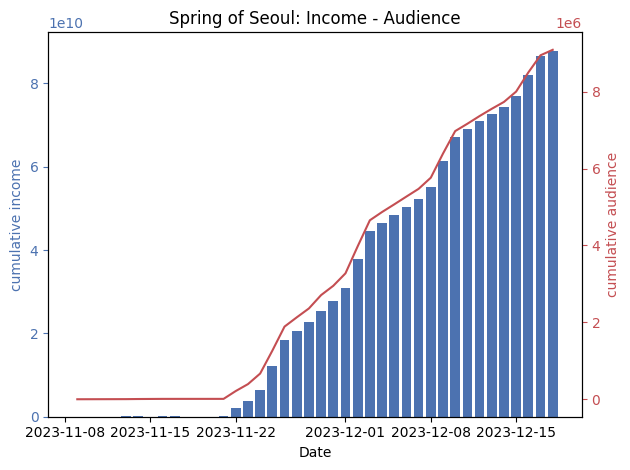

'\n서울의 봄의 일일 누적매출액과 누적관객수로 확인해보면,\n정말 유사한 형태를 띠는 것을 볼 수 있다.\n'

In [238]:
fig, ax1 = plt.subplots()

ax1.bar(df_SpringofSeoul['날짜'], df_SpringofSeoul['누적매출액'], label="cumulative income", color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('cumulative income', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
ax2.plot(df_SpringofSeoul['날짜'], df_SpringofSeoul['누적관객수'], label="cumulative audience", color='r')
ax2.set_ylabel('cumulative audience', color='r')
ax2.tick_params('y', colors='r')

plt.title('Spring of Seoul: Income - Audience')
fig.tight_layout()
plt.show()

'''
서울의 봄의 일일 누적매출액과 누적관객수로 확인해보면,
정말 유사한 형태를 띠는 것을 볼 수 있다.
'''